# IE7500 Project

IE7500 - Applied natural language processing

Name: Dat H. Tran

SID: 002925316

In [1]:
import numpy
import numpy as np
import pandas
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import tqdm

import nltk
import sklearn
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import train_test_split

In [2]:
import datasets 
datasets.logging.set_verbosity_error()

c:\Users\thund\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)

To import the data for the project:

* Go to https://amazon-reviews-2023.github.io/
* Select a category and download it, using the "review" download link
* You should get a "/category/.jsonl.gz file.
* Extract the jsonl file.
* Use its file location in the variable file below.

In [22]:
import json

file = f"C:\\Data\\IE7500_Data\\Industrial_and_Scientific.jsonl"
# with open(file, 'r') as fp:
#     for line in fp:
#         print(json.loads(line.strip()))

df = pd.read_json(file, lines=True)
df


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Best value for the money,These masks are great even though there is no ...,[],B08C7HDF1F,B0BX2672L8,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2023-02-17 02:54:13.163,3,True
1,5,TOO good.,These scissors are so good they got stolen by ...,[],B07BT4YLHT,B07BT4YLHT,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2022-12-24 01:09:30.434,1,True
2,4,Good,Good. Sensor push easier to work with but thes...,[],B06XY65HCX,B06XY65HCX,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-01-21 19:54:56.378,0,True
3,5,Five Stars,Great ORB finish & size. Bought for our laundr...,[],B01KW20EQ0,B01KW20EQ0,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,2018-07-02 18:39:44.971,0,True
4,1,Only one ply - will not work,These masks are notably thinner than other dis...,[],B08F59NF33,B08N66L183,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2022-01-30 14:50:43.612,0,True
...,...,...,...,...,...,...,...,...,...,...
5183000,1,Annoying,This is the worst! It is basically super glue....,[],B0012TREK2,B0012TREK2,AF4KDWDGCJSUEB7JESQZ6ZWD2LNA,2016-08-21 01:12:57.000,0,False
5183001,1,"Waste of time, horrible quality",Do not purchase this. It didnt work. I purchas...,[],B01D8HJ2JG,B01D8HJ2JG,AHWI3V56YUTU7UXMPFNXTLYF4SFQ,2017-04-21 20:45:59.000,2,True
5183002,5,Many Great Features,I was surprised at how many useful features it...,[],B08GQPMHYZ,B08GQPMHYZ,AHQETDYKHVDNGMGBWVJL6VJXJGFQ,2023-09-09 18:56:24.943,0,True
5183003,5,Best Meter For The Price,The autoranging is great. I hated the 30 posit...,[],B07DW681FQ,B0C7ZZ91LZ,AHQETDYKHVDNGMGBWVJL6VJXJGFQ,2018-11-29 14:29:30.413,0,True


# Data Preprocessing

In [23]:
df.sort_values(by="timestamp", inplace=True, ascending=False)
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
5181320,5,Great look and easy to use.,It is easy to use and I like the sleek look of...,[],B0BC5YMD4Y,B0BF5L3K95,AGDWCKIMFJR2KPWZRGQKOXHBM2XA,2023-09-12 17:40:25.306,0,True
5177390,5,Decent item,"Seem ok, they work.",[],B08ZY6D58J,B07G44BDW5,AE3IXZX7XXJR4LQU2PHLGYG6PUYQ,2023-09-12 16:11:59.314,0,True
5181500,4,Door Hanging Rack,Overall these are good for what I paid. Two th...,[],B07Z2N8B8J,B07ZS6RWRT,AGELW7XA7JZODTWXTME5JPU3HEHQ,2023-09-12 13:07:10.072,0,True
5177629,5,2 box stores,I don't know how but 2 box stores later and no...,[],B007Q2G36U,B007Q45CGU,AFLMRXASCRBRRAJKBWAX3HSPC4MA,2023-09-12 08:26:13.995,0,True
5182782,5,Well made product,Best pickup tool,[],B07V6FDS9R,B07V5FVRV8,AHFZEQGOBANV4GOGX6HK6IKPJNGA,2023-09-12 03:57:28.902,0,True
...,...,...,...,...,...,...,...,...,...,...
3699437,5,Better than the B &amp; C Eagle B18-34 3/4&quo...,Amazing! After months of using the B &amp; C ...,[],B0000225GO,B0000225GO,AHIQOXFZSK22AHKR2ZMEVTVW2QYA,2000-01-13 00:12:34.000,6,False
4849132,5,First 311 I ever bought and It has made me a b...,Transistor is the first 311 CD I have ever bou...,[],B000003CMZ,B000003CMZ,AEODH6PDR35YVED2OTHF4HRNBCTQ,1999-10-27 01:06:14.000,0,False
4523384,3,chsmt@voyager.net,The cd is alright with songs like &quot;Beauti...,[],B000003CMZ,B000003CMZ,AG55F7R3HZICMZOSGSPFV24V52XA,1998-08-04 04:47:33.000,0,False
4765479,4,Great CD,The music is different than the stuff that i u...,[],B000003CMZ,B000003CMZ,AEKRVXSHCSWPK4QXAQOQWWHU5OWA,1998-07-15 02:56:46.000,0,False


We filter to the newest 500,000 reviews. We also filter to only buyer, for authentic review.

In [ ]:
# current_year = pd.Timestamp.now().year

# df_3year = df[(df['timestamp'].dt.year >= current_year - 3) & (df['verified_purchase'] == True)]
# df_3year

In [24]:
df_new = df[df['verified_purchase'] == True]
df_new = df_new[0:50000]
df_new

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
5181320,5,Great look and easy to use.,It is easy to use and I like the sleek look of...,[],B0BC5YMD4Y,B0BF5L3K95,AGDWCKIMFJR2KPWZRGQKOXHBM2XA,2023-09-12 17:40:25.306,0,True
5177390,5,Decent item,"Seem ok, they work.",[],B08ZY6D58J,B07G44BDW5,AE3IXZX7XXJR4LQU2PHLGYG6PUYQ,2023-09-12 16:11:59.314,0,True
5181500,4,Door Hanging Rack,Overall these are good for what I paid. Two th...,[],B07Z2N8B8J,B07ZS6RWRT,AGELW7XA7JZODTWXTME5JPU3HEHQ,2023-09-12 13:07:10.072,0,True
5177629,5,2 box stores,I don't know how but 2 box stores later and no...,[],B007Q2G36U,B007Q45CGU,AFLMRXASCRBRRAJKBWAX3HSPC4MA,2023-09-12 08:26:13.995,0,True
5182782,5,Well made product,Best pickup tool,[],B07V6FDS9R,B07V5FVRV8,AHFZEQGOBANV4GOGX6HK6IKPJNGA,2023-09-12 03:57:28.902,0,True
...,...,...,...,...,...,...,...,...,...,...
3300737,4,Nice spades but 14 awg is too small,These are pretty good quality. The spades are ...,[{'small_image_url': 'https://m.media-amazon.c...,B082M74FVZ,B0B457T8HH,AHEQFWFZ5NW5ZPV56ODB4VA2EHVQ,2023-05-04 20:41:16.482,0,True
3428046,4,Great for price,Definitely will need a longer rope. But great ...,[],B0B5GFFR1Y,B0CCN7DXYN,AGWQRHZNKDRARO7RMLSSXJSMWBNQ,2023-05-04 20:41:15.789,0,True
3530583,2,Does not fit Echo PB250,I verified this part number from the Echo webs...,[],B075MQGVXJ,B075MQGVXJ,AEZWC3SZUXZ2PD432NTQYBT7F7XQ,2023-05-04 20:40:42.621,0,True
3455092,5,As described. It is a sturdy part and much str...,As described. It is a sturdy part and much str...,[],B07ZCQ54JT,B0BBS8F9CR,AFEGRC2ZA6T5FYSZRHVQTKIOXB3A,2023-05-04 20:38:52.360,0,True


In [25]:
#Filter to only necessary column

df_pre = df_new[["rating", "title", "text"]]
df_pre

,rating,title,text
5181320,5,Great look and easy to use.,It is easy to use and I like the sleek look of...
5177390,5,Decent item,"Seem ok, they work."
5181500,4,Door Hanging Rack,Overall these are good for what I paid. Two th...
5177629,5,2 box stores,I don't know how but 2 box stores later and no...
5182782,5,Well made product,Best pickup tool
...,...,...,...
3300737,4,Nice spades but 14 awg is too small,These are pretty good quality. The spades are ...
3428046,4,Great for price,Definitely will need a longer rope. But great ...
3530583,2,Does not fit Echo PB250,I verified this part number from the Echo webs...
3455092,5,As described. It is a sturdy part and much str...,As described. It is a sturdy part and much str...


Add a binary column:

Value 1 is defined as any review with more than 3 stars in rating (positive class). Otherwise it is treated as negative.

This column is used as target for the classification task.

In [26]:
# # Define your conditions and choices
# conditions = [
#     (df['rating'] >= 1) & (df['rating'] <= 2),
#     (df['rating'] > 2) & (df['rating'] <= 4),
#     (df['rating'] > 4) & (df['rating'] <= 5)
# ]

# choices = [-1, 0, 1]

# # Create the new column using np.select
# df['class'] = np.select(conditions, choices, default=np.nan)

# Define classification for each review. Any rating greater than 3 (i.e. 4 and 5) is positive, other values are negative.
df_pre['class'] = (df_pre['rating'] > 3).astype(int)
df_pre

C:\Users\thund\AppData\Local\Temp\ipykernel_18032\3008751881.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['class'] = (df_pre['rating'] > 3).astype(int)


,rating,title,text,class
5181320,5,Great look and easy to use.,It is easy to use and I like the sleek look of...,1
5177390,5,Decent item,"Seem ok, they work.",1
5181500,4,Door Hanging Rack,Overall these are good for what I paid. Two th...,1
5177629,5,2 box stores,I don't know how but 2 box stores later and no...,1
5182782,5,Well made product,Best pickup tool,1
...,...,...,...,...
3300737,4,Nice spades but 14 awg is too small,These are pretty good quality. The spades are ...,1
3428046,4,Great for price,Definitely will need a longer rope. But great ...,1
3530583,2,Does not fit Echo PB250,I verified this part number from the Echo webs...,0
3455092,5,As described. It is a sturdy part and much str...,As described. It is a sturdy part and much str...,1


We now have a corpus. Next, we will apply tokenization, filtering stopwords, and lemmatization.

In [27]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

def process_text(text):
    tokens = nltk.tokenize.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return lemmatized_tokens

In [28]:
df_pre['text'] = df_pre['text'].apply(process_text)
df_pre['title'] = df_pre['title'].apply(process_text)

C:\Users\thund\AppData\Local\Temp\ipykernel_18032\3537894199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['text'] = df_pre['text'].apply(process_text)
C:\Users\thund\AppData\Local\Temp\ipykernel_18032\3537894199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['title'] = df_pre['title'].apply(process_text)


In [29]:
df_pre

,rating,title,text,class
5181320,5,"[great, look, easy, use, .]","[easy, use, like, sleek, look, .]",1
5177390,5,"[decent, item]","[seem, ok, ,, work, .]",1
5181500,4,"[door, hanging, rack]","[overall, good, paid, ., two, thing, make, bet...",1
5177629,5,"[2, box, store]","[n't, know, 2, box, store, later, one, adapter...",1
5182782,5,"[well, made, product]","[best, pickup, tool]",1
...,...,...,...,...
3300737,4,"[nice, spade, 14, awg, small]","[pretty, good, quality, ., spade, nice, golden...",1
3428046,4,"[great, price]","[definitely, need, longer, rope, ., great, qua...",1
3530583,2,"[fit, echo, pb250]","[verified, part, number, echo, website, orderi...",0
3455092,5,"[described, ., sturdy, part, much, stronger, b...","[described, ., sturdy, part, much, stronger, b...",1


We apply a weight to title column, as it is usually indicative of the classification and rating. 

Using this weight, we combine both textual content of "title" and "text" into a single text field "combined".

In [30]:
title_weight = 5

df_pre['combined'] = df_pre['title']*title_weight + df_pre['text']

longest_sublist = max(df_pre['combined'], key=len)

df_pre['combined'] = df_pre['combined'].apply(' '.join)

df_pre

C:\Users\thund\AppData\Local\Temp\ipykernel_18032\316664145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['combined'] = df_pre['title']*title_weight + df_pre['text']
C:\Users\thund\AppData\Local\Temp\ipykernel_18032\316664145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['combined'] = df_pre['combined'].apply(' '.join)


,rating,title,text,class,combined
5181320,5,"[great, look, easy, use, .]","[easy, use, like, sleek, look, .]",1,great look easy use . great look easy use . gr...
5177390,5,"[decent, item]","[seem, ok, ,, work, .]",1,decent item decent item decent item decent ite...
5181500,4,"[door, hanging, rack]","[overall, good, paid, ., two, thing, make, bet...",1,door hanging rack door hanging rack door hangi...
5177629,5,"[2, box, store]","[n't, know, 2, box, store, later, one, adapter...",1,2 box store 2 box store 2 box store 2 box stor...
5182782,5,"[well, made, product]","[best, pickup, tool]",1,well made product well made product well made ...
...,...,...,...,...,...
3300737,4,"[nice, spade, 14, awg, small]","[pretty, good, quality, ., spade, nice, golden...",1,nice spade 14 awg small nice spade 14 awg smal...
3428046,4,"[great, price]","[definitely, need, longer, rope, ., great, qua...",1,great price great price great price great pric...
3530583,2,"[fit, echo, pb250]","[verified, part, number, echo, website, orderi...",0,fit echo pb250 fit echo pb250 fit echo pb250 f...
3455092,5,"[described, ., sturdy, part, much, stronger, b...","[described, ., sturdy, part, much, stronger, b...",1,described . sturdy part much stronger better p...


# Feature extraction

We use the following features as input for our models.

Bag of word (or term frequency)

In [31]:
tf_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
X_tf = tf_vectorizer.fit_transform(df_pre['combined'])

TF-IDF

In [32]:
tf_idf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
X_tf_idf = tf_idf_vectorizer.fit_transform(df_pre['combined'])

Both features are sparse matrices.

In [ ]:
# for word in tf_vectorizer.get_feature_names_out():
#     print(word)

In [34]:
# Assume 'vectorizer' is your trained CountVectorizer or TfidfVectorizer
# and 'X' is the result of vectorizer.fit_transform()

# Get the vocabulary
vocab = tf_vectorizer.get_feature_names_out()

# Calculate term frequencies
term_frequencies = np.sum(X_tf, axis=0)

# Convert matrix (term_frequencies) to array
term_frequencies = np.squeeze(np.asarray(term_frequencies))

# Sort by term frequencies
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_vocab = [vocab[i] for i in sorted_indices]
sorted_term_frequencies = term_frequencies[sorted_indices]

# Now 'sorted_vocab' contains the words sorted by term frequency
# and 'sorted_term_frequencies' contains the corresponding frequencies

In [35]:
sorted_vocab

['great',
 'good',
 'work',
 'product',
 'quality',
 'use',
 'br',
 'perfect',
 'well',
 'easy',
 'one',
 'like',
 'price',
 'nice',
 'fit',
 'used',
 'get',
 'love',
 'time',
 'worked',
 'buy',
 'would',
 'size',
 'needed',
 'strong',
 'need',
 'small',
 'best',
 'print',
 'money',
 'filament',
 'excellent',
 'item',
 'really',
 'made',
 'box',
 'bag',
 'exactly',
 'value',
 'little',
 'tape',
 'make',
 'better',
 'job',
 'advertised',
 'sturdy',
 'bought',
 'color',
 'hold',
 'much',
 'look',
 'expected',
 'part',
 'magnet',
 'screw',
 'even',
 'recommend',
 'tool',
 'got',
 'first',
 'came',
 'cheap',
 'described',
 'worth',
 'awesome',
 'thing',
 'fast',
 'bad',
 'using',
 'printer',
 'clean',
 'right',
 'super',
 'could',
 'way',
 'issue',
 'come',
 'water',
 'amazing',
 'bottle',
 'set',
 'plastic',
 'perfectly',
 'also',
 'go',
 'light',
 'stuff',
 'back',
 'enough',
 'working',
 'poor',
 'put',
 'day',
 'pretty',
 'new',
 'replacement',
 'ok',
 'two',
 'stick',
 'month',
 'fine

In [36]:
sorted_term_frequencies

array([39567, 28928, 28822, ...,     1,     1,     1], dtype=int64)

In [37]:
len(sorted_term_frequencies)

29701

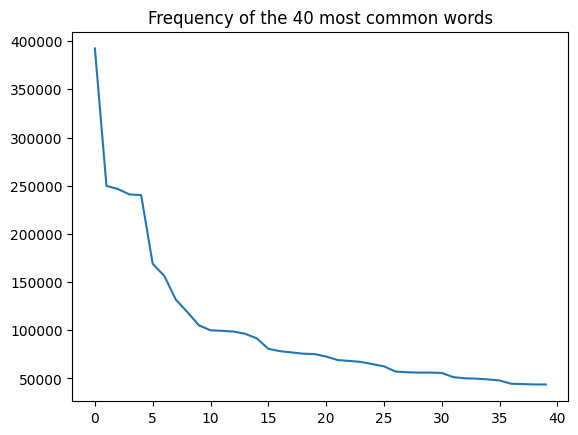

In [16]:
plt.plot(sorted_term_frequencies[0:40])
plt.title('Frequency of the 40 most common words')
plt.show()

# Classification

The task is to classify a review as either positive or negative.

For this task, we employ a Naive Bayes model and a logistic regression model.

Using TF

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression

# Split data into training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_tf, df_pre['class'], test_size=0.2, random_state=42)

# Naive Bayes
nb_model = sklearn.naive_bayes.MultinomialNB()
nb_model.fit(X_train, y_train)

# Logistic Regression
lr_model = sklearn.linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\thund\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# from sklearn.metrics import classification_report

# Predictions
nb_predictions = nb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluation
print("Naive Bayes Model:")
print(sklearn.metrics.classification_report(y_test, nb_predictions))
print(sklearn.metrics.confusion_matrix(y_test, nb_predictions))

print("Logistic Regression Model:")
print(sklearn.metrics.classification_report(y_test, lr_predictions))
print(sklearn.metrics.confusion_matrix(y_test, lr_predictions))

Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1998
           1       0.96      0.92      0.94      8002

    accuracy                           0.91     10000
   macro avg       0.85      0.89      0.87     10000
weighted avg       0.92      0.91      0.91     10000

[[1723  275]
 [ 629 7373]]
Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1998
           1       0.94      0.96      0.95      8002

    accuracy                           0.92     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.92      0.92      0.92     10000

[[1513  485]
 [ 336 7666]]


Using TF-IDF

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_tf_idf, df_pre['class'], test_size=0.2, random_state=42)

# Naive Bayes
nb_model_1 = sklearn.naive_bayes.MultinomialNB()
nb_model_1.fit(X_train, y_train)

# Logistic Regression
lr_model_1 = sklearn.linear_model.LogisticRegression()
lr_model_1.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predictions
nb_predictions = nb_model_1.predict(X_test)
lr_predictions = lr_model_1.predict(X_test)

# Evaluation
print("Naive Bayes Model:")
print(sklearn.metrics.classification_report(y_test, nb_predictions))
print(sklearn.metrics.confusion_matrix(y_test, nb_predictions))

print("Logistic Regression Model:")
print(sklearn.metrics.classification_report(y_test, lr_predictions))
print(sklearn.metrics.confusion_matrix(y_test, lr_predictions))

Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.95      0.40      0.56      1998
           1       0.87      0.99      0.93      8002

    accuracy                           0.88     10000
   macro avg       0.91      0.70      0.74     10000
weighted avg       0.88      0.88      0.85     10000

[[ 791 1207]
 [  43 7959]]
Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1998
           1       0.93      0.98      0.95      8002

    accuracy                           0.92     10000
   macro avg       0.90      0.83      0.86     10000
weighted avg       0.92      0.92      0.92     10000

[[1386  612]
 [ 199 7803]]


# Regression

The task is to predict the rating of a review based on its textual content.

For this task, we employ Linear Regression.

In [13]:
from sklearn.linear_model import LinearRegression

# Split data into training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_tf_idf, df_pre['rating'], test_size=0.2)

# Linear Regression
linear_model_1 = sklearn.linear_model.LinearRegression()
linear_model_1.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions
predictions = linear_model_1.predict(X_test)

# Evaluation
rmse = sklearn.metrics.root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 1.3781713530106094
Mean Absolute Error: 0.8028526644447058


In [15]:
test_input = [' '.join(case_) for case_ in [process_text(case) for case in ["terrible, the color faded after 1 wash", "bad package and delayed delivery but that aside the texture is smooth and smell good", "this product is good"]]]
test_input


['terrible , color faded 1 wash',
 'bad package delayed delivery aside texture smooth smell good',
 'product good']

In [16]:
test = tf_idf_vectorizer.transform(test_input)
test

<3x22187 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [18]:
linear_model_1.predict(test)

array([0.9333236 , 3.48930117, 4.63275401])

In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense

# # Define the model
# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=32))  # Let's say we have 10,000 unique words
# model.add(LSTM(32))
# model.add(Dense(1, activation='linear'))

# # Compile the model
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
# pip install --upgrade torch

# Recurrent Neural Network

In [19]:
import tensorflow
import tensorflow as tf

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_pre['combined'], df_pre['rating'], test_size=0.2)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# Pad sequences to ensure uniform length
max_len = len(longest_sublist)  # Maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert ratings to numpy array
ratings = y_train.values

# Define RNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(32, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(padded_sequences, ratings, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(padded_sequences, ratings)
print("Mean Squared Error:", loss)


Epoch 1/10
  38/1000 [>.............................] - ETA: 15:21 - loss: 8.9926

KeyboardInterrupt: 

In [21]:
# Predictions
# new_reviews = ["Highly recommended!", "Disappointing experience.", "Decent product, worth the money."]
new_sequences = tokenizer.texts_to_sequences(X_test)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len)
predictions = model.predict(new_padded_sequences)
print("Predictions:", predictions)

# Evaluation
rmse = sklearn.metrics.root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

313/313 [==============================] - 16s 50ms/step
Predictions: [[4.868572 ]
 [4.8921595]
 [4.8866897]
 ...
 [3.5381708]
 [4.8948727]
 [4.6498556]]
Root Mean Squared Error: 0.795620686544993
Mean Absolute Error: 0.4784556198596954
